In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from joblib import dump, load
#sk is an external library

In [106]:
#machine learning with pandas and ML Algorithms 
df = pd.read_csv('Housing.csv')

In [107]:
df.size

7085

In [108]:
df.shape

(545, 13)

In [109]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [110]:
df.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [111]:
np.sum(df.isnull())

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [112]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [113]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [114]:
#we want to be able to predict the price - based on x the price will be y
#firstly we need to change the yes/no fields into 1s and 0s
#yes -> 1
#no -> 0
#furnished -> 2
#semi furnish -> 1
#unfurnished -> 0

file2=df.replace(to_replace=['yes', 'no', 'furnished', 'semi-furnished', 'unfurnished'],value=[1,0,2,1,0])
file2


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,2


In [115]:
#Best practice for naming conventions for splitting dataset... x=input datasets, y=output datasets
X = file2.drop(columns=['price'])   #input dataset 
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [125]:
#next we need to split the datasets into train and test datasets 
#train roughy 80% of the dataset and then 20% is the test
# see what we imported at the top of the page
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)

In [126]:
housemodel = DecisionTreeClassifier()

In [127]:
housemodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [128]:
predict_house_price=housemodel.predict([[8960,4,1,2,1,1,0,0,1,1,0,0]])

In [129]:
predict_house_price

array([5250000], dtype=int64)

Text(0.5, 1.0, 'Housing Price Predictions')

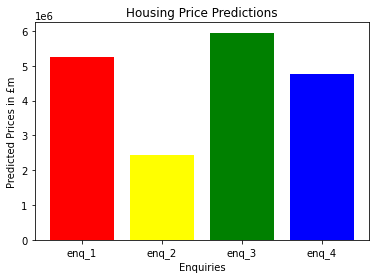

In [146]:
feature_names = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus']
input_data = [[8960,4,1,2,1,1,0,0,1,1,0,0],[3000,1,0,2,1,1,0,0,1,1,0,0],
              [7330,4,1,2,1,1,0,0,1,1,0,0],[8960,2,1,2,1,1,0,0,1,1,0,0]]
predictions=housemodel.predict(input_data)
predictions
predicted_prices = [predict for predict in predictions]

fig, ax=plt.subplots()
ax.bar(['enq_1', 'enq_2', 'enq_3', 'enq_4'], predicted_prices, color=['red', 'yellow', 'green', 'blue'])
ax.set_xlabel('Enquiries')
ax.set_ylabel('Predicted Prices in £m')
ax.set_title('Housing Price Predictions')


In [131]:
# for each_item , input_row in enumerate([input_data]):
#     feature_dictionary = dict(zip(feature_names, input_row))
#     prediction_in_pairs = {'predicted price': predictions[each_item]}
#     output_result = {**feature_dictionary, **prediction_in_pairs}
#     print(output_result)
#highlight everything "ctrl /" to comment everything out

{'area': 8960, 'bedrooms': 4, 'bathrooms': 1, 'stories': 2, 'mainroad': 1, 'guestroom': 1, 'basement': 0, 'hotwaterheating': 0, 'airconditioning': 1, 'parking': 1, 'prefarea': 0, 'furnishingstatus': 0, 'predicted price': 5250000}


In [132]:
check_accuracy = housemodel.predict(X_test)
Scores = accuracy_score(y_test, check_accuracy)

In [133]:
print(Scores)

0.01818181818181818


In [136]:
dump(housemodel, 'housepredictionmodel.joblib')

['housepredictionmodel.joblib']